# Heart Disease Analysis

List of available variables:

 1. age: continuous
 2. sex: categorical, 2 values {0: female, 1: male}
 3. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
 4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
 5. chol (serum cholesterol level): continuous (mg/dl)
 6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
 7. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
 8. thalach (maximum heart rate achieved): continuous
 9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. num (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}
    
The actual number of feature variables (after converting categorical variables
to dummy ones) is: 
1 (age) + 1 (sex) + 3 (cp) + 1 (restbp) + 1 (chol) + 1 (fbs) + 2 (restecg) + 
1 (thalach) + 1 (exang) + 1 (oldpeak) + 2 (slope) + 1 (ca) + 2 (thal) = 18

The response variable (num) is categorical with 5 values, but we don't have
enough data to predict all the categories. Therefore we'll replace num with:
14. hd (heart disease): categorical, 2 values {0: no, 1: yes}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

In [6]:
#Reading the data fron CSV file using pandas
df = pd.read_csv("data/heart_disease_all14.csv", index_col=None,na_values=['NA'], header=0)

In [7]:
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0.0.2
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0


In [8]:
#Checking the number of rows and columns in the dataset
df.shape

(298, 14)

In [10]:
#Naming features columns as per dataset description
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = pd.read_csv("data/heart_disease_all14.csv", sep=',', header=None, names=columns)


In [11]:
#Viewing a first few rows of the dataset using head function
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [16]:
df.to_csv("data/heart-dataset.csv", index=False)

In [12]:
#Checking feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
age        299 non-null float64
sex        299 non-null float64
cp         299 non-null float64
restbp     299 non-null float64
chol       299 non-null float64
fbs        299 non-null float64
restecg    299 non-null float64
thalach    299 non-null float64
exang      299 non-null float64
oldpeak    299 non-null float64
slope      299 non-null float64
ca         299 non-null float64
thal       299 non-null float64
num        299 non-null float64
dtypes: float64(14)
memory usage: 32.8 KB


In [13]:
#Checking statistics such as mean, standard deviation, minimum and maximum values
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


##Generating histograms for viewing distribution of values

(0.0, 1.0, 0.0, 1.0)

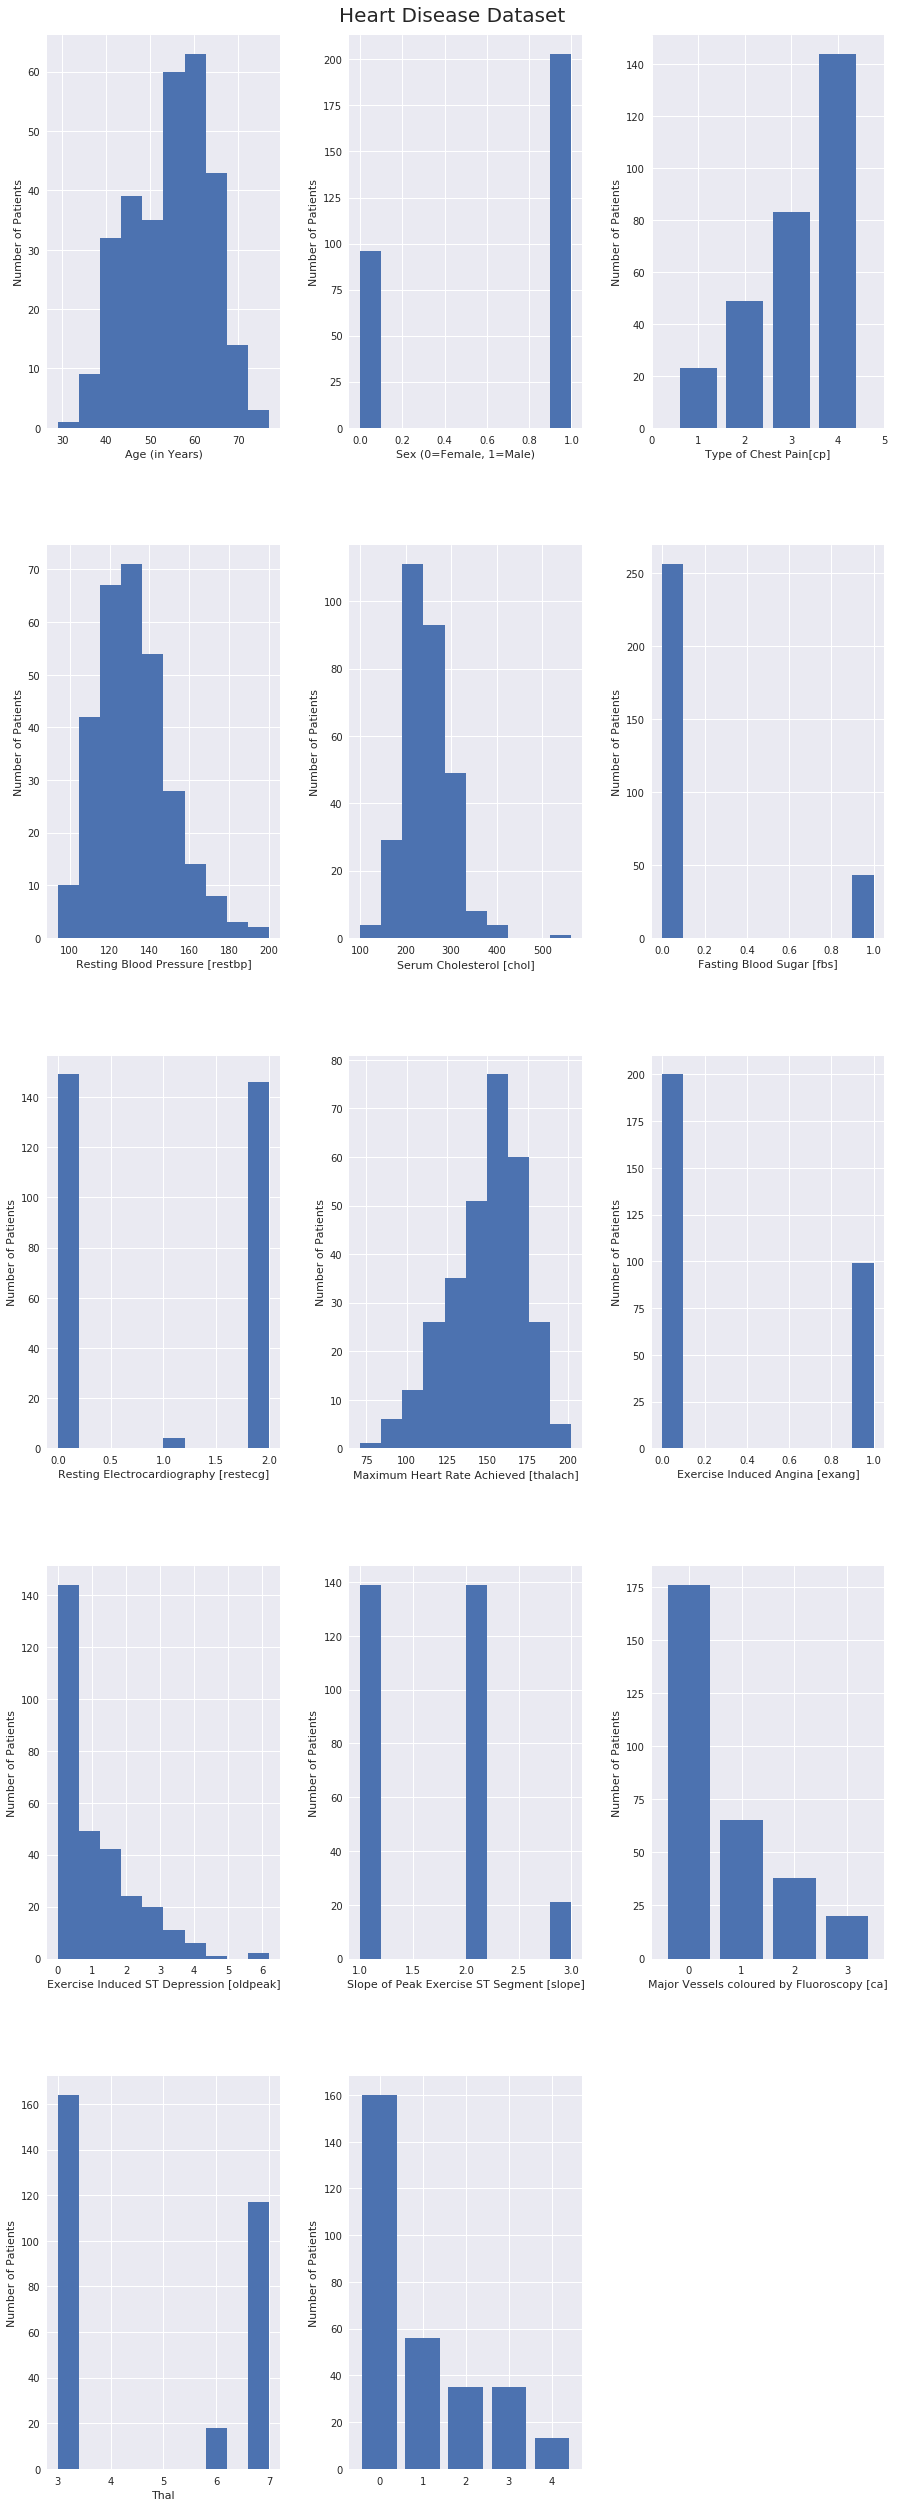

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,40))
plt.subplots_adjust(wspace=0.30, hspace=0.30, top=0.97)
plt.suptitle("Heart Disease Dataset", fontsize=20)
axes[0,0].hist(df.age)
axes[0,0].set_xlabel("Age (in Years)")
axes[0,0].set_ylabel("Number of Patients")

axes[0,1].hist(df.sex)
axes[0,1].set_xlabel("Sex (0=Female, 1=Male)")
axes[0,1].set_ylabel("Number of Patients")

axes[0,2].hist(df.cp, bins=4, range=(0.5,4.5), rwidth=0.8)
axes[0,2].set_xlim(0.0,5.0)
axes[0,2].set_xlabel("Type of Chest Pain[cp]")
axes[0,2].set_ylabel("Number of Patients")
axes[1,0].hist(df.restbp)
axes[1,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(df.chol)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].set_ylabel("Number of Patients")
axes[1,2].hist(df.fbs)
axes[1,2].set_xlabel("Fasting Blood Sugar [fbs]")
axes[1,2].set_ylabel("Number of Patients")
axes[2,0].hist(df.restecg)
axes[2,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(df.thalach)
axes[2,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[2,1].set_ylabel("Number of Patients")
axes[2,2].hist(df.exang)
axes[2,2].set_xlabel("Exercise Induced Angina [exang]")
axes[2,2].set_ylabel("Number of Patients")
axes[3,0].hist(df.oldpeak)
axes[3,0].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[3,0].set_ylabel("Number of Patients")
axes[3,1].hist(df.slope)
axes[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[3,1].set_ylabel("Number of Patients")
axes[3,2].hist(df.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[3,2].set_xlim(-0.7,3.7)
axes[3,2].set_xlabel("Major Vessels coloured by Fluoroscopy [ca]")
axes[3,2].set_ylabel("Number of Patients")
axes[4,0].hist(df.thal)
axes[4,0].set_xlabel("Thal")
axes[4,0].set_ylabel("Number of Patients")
axes[4,1].hist(df.num, bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[4,1].set_label("Heart Disease [num]")
axes[4,1].set_ylabel("Number of Patients")
axes[4,2].axis("off")

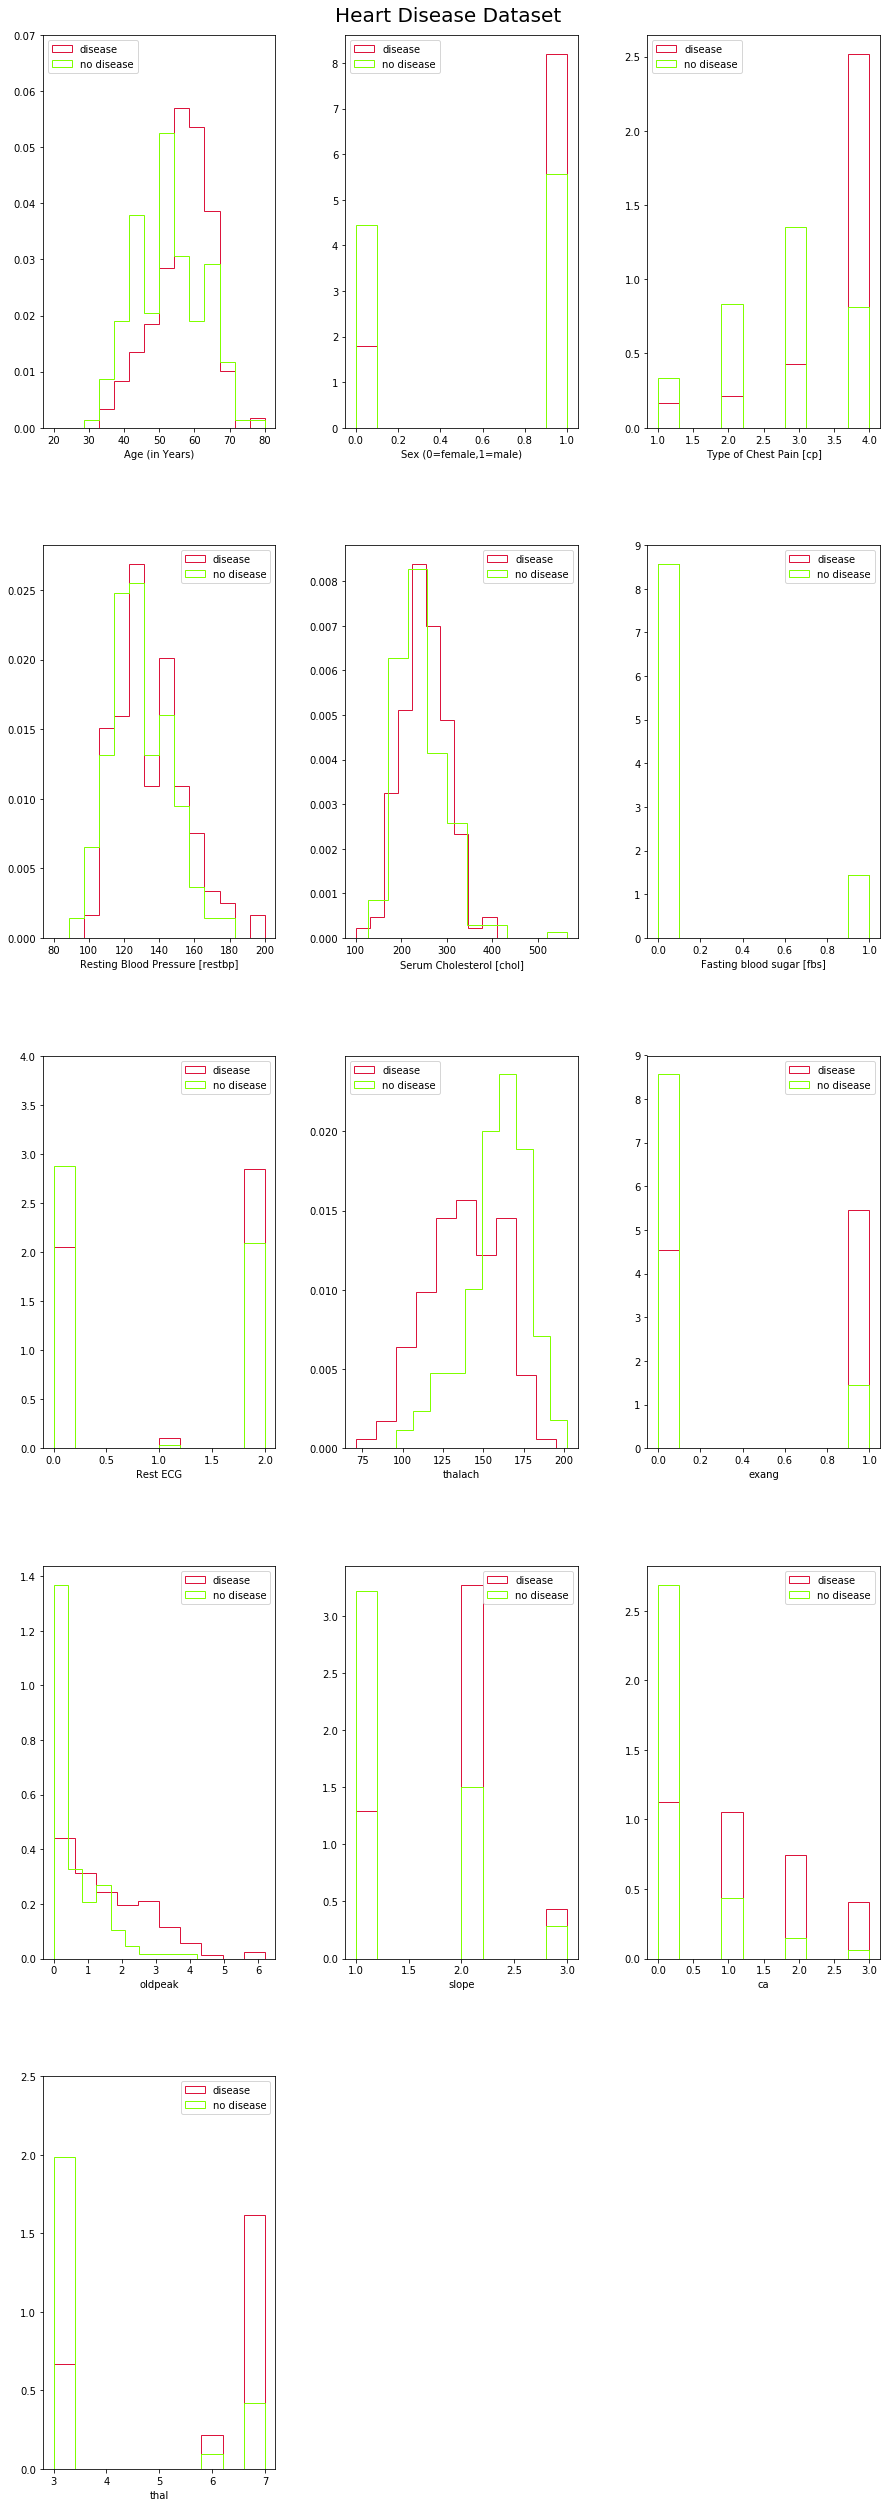

In [15]:
#Marginal Feature Distribution comapared for disease and not-disease
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,40))
plt.subplots_adjust(wspace=0.30, hspace=0.30, top=0.97)
plt.suptitle("Heart Disease Dataset", fontsize=20)
bins = np.linspace(20,80,15)
axes[0,0].hist(df[df.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,0].hist(df[df.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,0].set_xlabel("Age (in Years)")
axes[0,0].set_ylim(0.0,0.070)
axes[0,0].legend(prop={'size': 10},loc="upper left")
axes[0,1].hist(df[df.num>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,1].hist(df[df.num==0].sex,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].legend(prop={'size': 10},loc="upper left")
axes[0,2].hist(df[df.num>0].cp.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,2].hist(df[df.num==0].cp,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axes[1,0].hist(df[df.num>0].restbp.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,0].hist(df[df.num==0].restbp,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[1,0].legend(prop={'size': 10},loc="upper right")
axes[1,1].hist(df[df.num>0].chol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,1].hist(df[df.num==0].chol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].legend(prop={'size': 10},loc="upper right")
axes[1,2].hist(df[df.num>0].fbs.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,2].hist(df[df.num==0].fbs,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,2].set_xlabel("Fasting blood sugar [fbs]")
axes[1,2].legend(prop={'size': 10},loc="upper right")
axes[2,0].hist(df[df.num>0].restecg.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[2,0].hist(df[df.num==0].restecg,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[2,0].set_xlabel("Rest ECG")
axes[2,0].set_ylim(0.0,4.0)
axes[2,0].legend(prop={'size': 10},loc="upper right")
axes[2,1].hist(df[df.num>0].thalach.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[2,1].hist(df[df.num==0].thalach,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[2,1].set_xlabel("thalach")
axes[2,1].legend(prop={'size': 10},loc="upper left")
axes[2,2].hist(df[df.num>0].exang.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[2,2].hist(df[df.num==0].exang,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[2,2].set_xlabel("exang")
axes[2,2].legend(prop={'size': 10},loc="upper right")
axes[3,0].hist(df[df.num>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[3,0].hist(df[df.num==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[3,0].set_xlabel("oldpeak")
axes[3,0].legend(prop={'size': 10},loc="upper right")
axes[3,1].hist(df[df.num>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[3,1].hist(df[df.num==0].slope,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[3,1].set_xlabel("slope")
axes[3,1].legend(prop={'size': 10},loc="upper right")
axes[3,2].hist(df[df.num>0].ca.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[3,2].hist(df[df.num==0].ca,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[3,2].set_xlabel("ca")
axes[3,2].legend(prop={'size': 10},loc="upper right")
axes[4,0].hist(df[df.num>0].thal.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[4,0].hist(df[df.num==0].thal,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[4,0].set_xlabel("thal")
axes[4,0].set_ylim(0.0,2.5)
axes[4,0].legend(prop={'size': 10},loc="upper right")
axes[4,1].axis("off")
axes[4,2].axis("off")
plt.show()